  # Notebook Template

# Initializations

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
%load_ext autoreload  
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import sys
import argparse
import csv
import json
import time
import types, copy
from datetime import datetime
if './src' not in sys.path:
    print(f"insert ./src")
    sys.path.insert(0, './src')
print(sys.path)


import numpy as np
np.set_printoptions(edgeitems=3, infstr='inf', linewidth=150, nanstr='nan')

import pandas as pd
pd.options.display.width = 132

from scipy.sparse import csr_matrix
from collections.abc import Iterator

import pprint
pp = pprint.PrettyPrinter(indent=4)

os.environ["WANDB_NOTEBOOK_NAME"] = "Adashare_Train.ipynb"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

insert ./src
['./src', '/home/kevin/WSL-shared/Cellpainting/cj-datasets', '/home/kevin/miniforge3/envs/cp312/lib/python312.zip', '/home/kevin/miniforge3/envs/cp312/lib/python3.12', '/home/kevin/miniforge3/envs/cp312/lib/python3.12/lib-dynload', '', '/home/kevin/miniforge3/envs/cp312/lib/python3.12/site-packages']


In [3]:
from utils import display_gpu_info, display_gpu_device_info
from utils_ml import model_selection 
# (initialize, init_dataloaders, init_environment, init_wandb, training_initializations, model_initializations, 
#  check_for_resume_training, disp_dataloader_info, disp_training_parms, warmup_phase, weight_policy_training, 
#  display_gpu_info, display_gpu_device_info, init_dataloaders_by_fold_id, print_separator, print_heading, 
#  timestring, print_loss, get_command_line_args, load_from_pickle ) 

In [ ]:
study_name = 'abc'
input(f" Delete study {study_name} ?")
if input.lower() in ['yes' ,'y']:
    print(' You responsed yes')

In [ ]:
import psycopg2
from sqlalchemy import create_engine

In [3]:
from chembl_webresource_client.new_client import new_client
from chembl_webresource_client.utils import utils

In [ ]:
import pubchempy as pcp

In [4]:
import rdkit
from rdkit.Chem import inchi
from rdkit.Chem import INCHI_AVAILABLE
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
import rdkit.Avalon.pyAvalonTools as pat
import rdkit.Chem.MolStandardize as rdms
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem.Pharm2D import Generate
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D

if INCHI_AVAILABLE:
  from rdkit.Chem import InchiReadWriteError
  from rdkit.Chem import MolToInchi, MolBlockToInchi, MolFromInchi, InchiToInchiKey, MolToInchiKey, MolFromMolFile, MolToMolFile
else:
    print('INCHI not available')

In [ ]:
print("1- '%x_%X'               : ",time.strftime('%x_%X'))
print("2- '%X.%f'               : ",datetime.now().strftime('%X.%f'))
print("3- '%X %x %Z'            : ",time.strftime('%X %x %Z'))
print("4- '%D-%X.%f'            : ",datetime.now().strftime('%D-%X.%f'))
print("5- '%Y-%m-%d %H:%M:%S.%f': ",datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f'))
print("6- '%Y%m%d_%H%M%S'       : ",datetime.now().strftime('%Y%m%d_%H%M%S'))
print("7- '%Y_%m_%d_%H:%M:%S'   : ",datetime.now().strftime('%Y_%m_%d_%H:%M:%S'))

timestamp = datetime.now().strftime('%Y_%m_%d_%H:%M:%S')
print('\n SQL Output filename:  ','./tmp/sql_cohort'+'_'+timestamp+'.txt')

## xgboost and dask imports 

In [92]:
import joblib
# from dask_cuda import LocalCUDACluster
# from sklearn.model_selection import GridSearchCV
import optuna

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

import dask
import dask.array as da
import dask.dataframe as dd
from dask import delayed
from dask.distributed import Client
from dask.distributed import LocalCluster
from dask_cuda import LocalCUDACluster
import dask_ml.model_selection as dcv
# from dask_ml.model_selection import train_test_split
# from dask_ml.model_selection import GridSearchCV, IncrementalSearchCV, HyperbandSearchCV
# from dask_ml.metrics import mean_squared_error, r2_score, mean_squared_log_error
import sklearn.metrics as skm

In [93]:
# os.environ["WANDB_NOTEBOOK_NAME"] = "Adashare_Train.ipynb"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [94]:
import warnings
warnings.filterwarnings('ignore')

## GPU Status

In [91]:
display_gpu_info()


CUDA Device(s) available
--------------------------
 CUDA device count   :  3
 CUDA current device :  0   name:  Quadro GV100


GPU Device Info 
------------------
 Device : cuda:0
   name:        Quadro GV100
   capability:  (7, 0)
   properties:  _CudaDeviceProperties(name='Quadro GV100', major=7, minor=0, total_memory=32508MB, multi_processor_count=80)
   Allocated :  0
   Reserved  :  0

 Device : cuda:1
   name:        Quadro GV100
   capability:  (7, 0)
   properties:  _CudaDeviceProperties(name='Quadro GV100', major=7, minor=0, total_memory=32508MB, multi_processor_count=80)
   Allocated :  0
   Reserved  :  0

 Device : cuda:2
   name:        NVIDIA TITAN Xp
   capability:  (6, 1)
   properties:  _CudaDeviceProperties(name='NVIDIA TITAN Xp', major=6, minor=1, total_memory=12196MB, multi_processor_count=30)
   Allocated :  0
   Reserved  :  0


GPU Usage Stats 
------------------
| ID | GPU | MEM |
------------------
|  0 | 52% | 15% |
|  1 |  0% |  1% |
|  2 |  0% |  0% |

 to

## Logging

In [96]:
logLevel = os.environ.get('LOG_LEVEL', 'INFO').upper()
FORMAT = '%(asctime)s - %(levelname)s: - %(message)s'
logging.basicConfig(level="INFO", format= FORMAT)
logging.getLogger("imported_module").setLevel(logging.CRITICAL)
logging.info(f" 1/7- engine connected")
logging.warning(f" 1/7- engine connected")
logging.error(f" 1/7- engine connected")
logging.critical(f" 1/7- engine connected")

# print(logging.NOTSET, logging.DEBUG,  logging.INFO, logging.WARN, logging.WARNING, logging.ERROR, logging.CRITICAL,  logging.FATAL)
# xgb.__version__

2024-01-31 12:51:09,205 - INFO: -  1/7- engine connected
2024-01-31 12:51:09,206 - WARNING: -  1/7- engine connected
2024-01-31 12:51:09,207 - ERROR: -  1/7- engine connected
2024-01-31 12:51:09,208 - CRITICAL: -  1/7- engine connected


## DB Connection

In [5]:
## Get ip address of Windows host from resolv.conf
# !cat /etc/hosts 
!cat /etc/resolv.conf

# This file was automatically generated by WSL. To stop automatic generation of this file, add the following entry to /etc/wsl.conf:
# [network]
# generateResolvConf = false
nameserver 172.30.144.1


In [6]:
LOCALDBHOST="MSI-GS76"
## Point to Host OS (Windows 10)
DBHOST = "172.30.144.1"    
# DBHOST = "172.31.208.1"
# DBHOST = "172.20.240.1"
# DBHOST = "172.27.0.1"

In [7]:
print(psycopg2.__version__)
engine = create_engine(f"postgresql://kevin:Ahwaz22@{DBHOST}:5432?dbname=chembl_32") 
conn = engine.connect()

2.9.3 (dt dec pq3 ext lo64)


# Start

In [69]:
identifier = 'QDBVSOZTVKXUES-UHFFFAOYSA-N'
# identifier = 'KRGQEOSDQHTZMX-IGCYCDGOSA-N'
smiles = 'N(C)CCCNC(=O)C1=CC=C(C=C1)C2=CC(=C3C(=C2)C=CC=N3)O'
# inchi      = 'InChI=1S/C6H8O6/c7-1-2(8)5-3(9)4(10)6(11)12-5/h2-3,5,7-9H,1H2/t2-,3?,5+/m0/s1'
# df_sql = pd.read_sql(f"SELECT molregno, molfile, standard_inchi,  canonical_smiles from chembl_32.compound_structures where standard_inchi_key = '{identifier}'", con = conn)
# df_sql = pd.read_sql(f"SELECT * from chembl_32.compound_structures where standard_inchi_key = '{identifier}'", con = conn)
# df_sql = pd.read_sql(f"SELECT * from chembl_32.compound_structures where standard_inchi = '{inchi}'", con = conn)
df_sql = pd.read_sql(f"SELECT * from chembl_32.compound_structures where canonical_smiles = '{smiles}'", con = conn)
df_sql

,molregno,molfile,standard_inchi,standard_inchi_key,canonical_smiles


In [9]:
def printMol(mol, width = 450, height = 150):
    bits = AllChem.GetMorganFingerprint(mol, 3) 
    print ('Chembl-id:    %s' % list(mol.GetPropNames()))
#     print ('Chembl-id:    %s' % mol.GetProp('chembl_id'))
    print ('Num of Atoms: %d' % mol.GetNumAtoms())
    print ("#bits:        %d" % len(bits.GetNonzeroElements()))
    print ('Smiles:       %s' % Chem.MolToSmiles(mol, isomericSmiles=True))
    print ("")
    drawMol(mol, width, height)

    
def drawMol(mol, width = 450, height = 150):
    from IPython.display import SVG
    from rdkit.Chem.Draw import rdMolDraw2D
#     molSize = (width, height)
    mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)

    drawer = rdMolDraw2D.MolDraw2DSVG(width, height)
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    display(SVG(svg.replace('svg:','')))  
    
    
def saveFingerprints(results, filename):
  """ results is a dictionary: chembl_id -> [fingerprints] """
  with open(filename, 'w') as csvfile:
    fpwriter = csv.writer(csvfile, delimiter=",", quoting=csv.QUOTE_NONE)
    fpwriter.writerow(["compound","feature"])
    for compound in results:
        for feature in results[compound]:
            fpwriter.writerow( [compound, feature] )
    print(f" => fingerprints written to {filename} ")   
    
    
    
    
def saveFingerprintsNpy(results, filename, cmpdlist, ecfp_fold=32000):
    """ write fingerprints to npy, compunds to CSV file """
    ## fp2 : list of tuples : each tuple: (compound id, (array of features, array of counts))
    fp2 =[(x,(np.array(list(results[x].keys())), np.array(list(results[x].values())))) for x in results] #TODO: Modify to save compound list
    
    ## cmpd: tuple of strings, each representing a chembl compound
    ## ecfp: tuple of tuples each tuple being an array of (features, counts)
    cmpd, ecfp   = zip(*fp2) 
    
    ## feat  : tuple of ndarrays, each member being a ndarray of features 
    ## counts: tuple of ndarrays, each member being a ndarray of counts 
    feat, counts = zip(*ecfp)
    
    ## Create indicies for csr matrix
    ## the column indices for row i are stored in indices[indptr[i]:indptr[i+1]] 
    ## their corresponding values are stored in data[indptr[i]:indptr[i+1]]
    lens    = np.array([len(f) for f in feat])
    indptr  = np.concatenate([[0], np.cumsum(lens)])
    indices = np.concatenate(feat) % ecfp_fold
    data    = np.ones(indices.shape[0])
    
    ## Create CSR matrix
    csr     = csr_matrix((data, indices, indptr), shape=(len(feat), ecfp_fold))
    csr.sum_duplicates()
    csr.data[:] = 1.0
    
    # write fingerprint data to numpy CSR sparse matrix 
    np.save(filename, csr)
    print(f" => fingerprints written to {filename} ")    
    
#     # write compounds to csv file 
#     pd.DataFrame(cmpd).to_csv(cmpdlist, header=False)
#     print(f" => compounds written to {cmpdlist} ")       
    

In [10]:
def saveFingerprints(results, filename):
  """ results is a dictionary: chembl_id -> [fingerprints] """
  with open(filename, 'w') as csvfile:
    fpwriter = csv.writer(csvfile, delimiter=",", quoting=csv.QUOTE_NONE)
    fpwriter.writerow(["compound","feature"])
    for compound in results:
        for feature in results[compound]:
            fpwriter.writerow( [compound, feature] )
    print(f" => fingerprints written to {filename} ")    

### Read compound metadata file

In [ ]:
# df = pd.read_csv('JUMP-MOA_compound_metadata.tsv', delimiter='\t')
# df = pd.read_csv('JUMP-Target-1_compound_metadata.tsv', delimiter='\t')
df = pd.read_csv('JUMP-Target-2_compound_metadata.tsv', delimiter='\t')

In [45]:
print(df.info())
df.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   broad_sample    306 non-null    object 
 1   InChIKey        307 non-null    object 
 2   pert_iname      307 non-null    object 
 3   pubchem_cid     297 non-null    float64
 4   target          306 non-null    object 
 5   pert_type       307 non-null    object 
 6   control_type    47 non-null     object 
 7   smiles          307 non-null    object 
 8   chembl_id       299 non-null    object 
 9   standard_inchi  299 non-null    object 
dtypes: float64(1), object(9)
memory usage: 24.1+ KB
None


,broad_sample,InChIKey,pert_iname,pubchem_cid,target,pert_type,control_type,smiles,chembl_id,standard_inchi
0,BRD-K09338665-001-07-1,KBPLFHHGFOOTCA-UHFFFAOYSA-N,1-octanol,957.0,GJB4,trt,NaN,CCCCCCCCO,CHEMBL26215,"InChI=1S/C8H18O/c1-2-3-4-5-6-7-8-9/h9H,2-8H2,1H3"
1,BRD-K48278478-001-01-2,LOUPRKONTZGTKE-AFHBHXEDSA-N,quinine,94175.0,KCNN4,trt,NaN,COc1ccc2nccc([C@@H](O)[C@H]3C[C@@H]4CC[N@]3C[C...,CHEMBL576997,InChI=1S/C20H24N2O2/c1-3-13-12-22-9-7-14(13)10...
2,BRD-A85242401-001-12-3,KRGQEOSDQHTZMX-IGCYCDGOSA-N,ascorbic-acid,9888239.0,P3H1,trt,NaN,OC[C@H](O)[C@H]1OC(=O)C(=O)C1O,None,None
3,BRD-K93632104-001-17-2,YGSDEFSMJLZEOE-UHFFFAOYSA-N,salicylic-acid,118212070.0,AKR1C1,trt,NaN,OC(=O)c1ccccc1O,CHEMBL424,"InChI=1S/C7H6O3/c8-6-4-2-1-3-5(6)7(9)10/h1-4,8..."
4,BRD-K57313110-001-06-8,ODHCTXKNWHHXJC-VKHMYHEASA-N,pidolic-acid,7405.0,VEGFA,trt,NaN,OC(=O)[C@@H]1CCC(=O)N1,CHEMBL397976,"InChI=1S/C5H7NO3/c7-4-2-1-3(6-4)5(8)9/h3H,1-2H..."
5,BRD-K25244359-066-04-9,WPEWQEMJFLWMLV-UHFFFAOYSA-N,apatinib,11315474.0,CSK,trt,NaN,O=C(Nc1ccc(cc1)C1(CCCC1)C#N)c1cccnc1NCc1ccncc1,CHEMBL3186534,InChI=1S/C24H23N5O/c25-17-24(11-1-2-12-24)19-5...
6,BRD-K44067360-001-30-3,LPEPZBJOKDYZAD-UHFFFAOYSA-N,flufenamic-acid,3371.0,GJB4,trt,NaN,OC(=O)c1ccccc1Nc1cccc(c1)C(F)(F)F,CHEMBL23588,"InChI=1S/C14H10F3NO2/c15-14(16,17)9-4-3-5-10(8..."
7,BRD-K73276278-305-02-9,CYYNMPPFEJPBJD-OAQYLSRUSA-N,MCOPPB,24800108.0,OPRL1,trt,NaN,CC1(CCCCCCC1)N1CCC(CC1)n1c(nc2ccccc12)[C@@H]1C...,CHEMBL481512,InChI=1S/C26H40N4/c1-26(15-7-3-2-4-8-16-26)29-...
8,BRD-K59058747-001-22-9,PWKSKIMOESPYIA-BYPYZUCNSA-N,acetylcysteine,12035.0,SLC7A11,trt,NaN,CC(=O)N[C@@H](CS)C(O)=O,CHEMBL600,"InChI=1S/C5H9NO3S/c1-3(7)6-4(2-10)5(8)9/h4,10H..."
9,BRD-K68982262-001-02-9,DJKJVWJQAVGLHJ-YPMHNXCESA-N,A-987306,25109291.0,CCR1,trt,NaN,Nc1nc(N2CCNCC2)c2CCC3=C([C@@H]4CCCC[C@@H]4O3)c2n1,CHEMBL519240,InChI=1S/C18H25N5O/c19-18-21-16-12(17(22-18)23...


In [12]:
print(df.iloc[2]['InChIKey'])

KRGQEOSDQHTZMX-IGCYCDGOSA-N


### Using pubchempy

In [55]:

# cid = 5282350
# c = pcp.Compound.from_cid(cid)
# inchi_str = c.inchi

In [52]:
df[df['chembl_id'].isnull()].InChIKey

2      KRGQEOSDQHTZMX-IGCYCDGOSA-N
22     LLPBUXODFQZPFH-UHFFFAOYSA-N
34     FMYGNANMYYHBSU-UHFFFAOYSA-N
124    RXWNCPJZOCPEPQ-DYKMBDCPSA-N
146    QIHBWVVVRYYYRO-UHFFFAOYSA-N
182    NGTDJJKTGRNNAU-UHFFFAOYSA-N
215    ZZZRUAITSXLWBH-CSYJEMQYSA-N
263    WJBLNOPPDWQMCH-UHFFFAOYSA-N
Name: InChIKey, dtype: object

In [76]:
identifier = df.iloc[2]['InChIKey']
print(f' Get Compound from inchikey : {identifier}')

 Get Compound from inchikey : KRGQEOSDQHTZMX-IGCYCDGOSA-N


In [ ]:
c1[0].

In [77]:
c1 = pcp.get_compounds(identifier, namespace=u'inchikey', searchtype=None, as_dataframe=False )
print(type(c1))


<class 'list'>


In [99]:
import base64
for c2 in c1: 
    print(f"cid                 : {c2.cid}")
    print(f'Molecular formula   : {c2.molecular_formula}')
    print(f' Molecular weight   : {c2.molecular_weight}')
    print(f"canonical_smiles    : {c2.canonical_smiles}")
    print(f"isomeric_smiles     : {c2.isomeric_smiles}")
    print(f"fingerprint         : {c2.fingerprint}   {type(c2.fingerprint)} {len(c2.fingerprint)}")
    bytes_fingerprint =  c2.fingerprint.join("00").encode('ascii')
    print(f"fingerprint         : {bytes_fingerprint}   {type(bytes_fingerprint)} {len(bytes_fingerprint)}")
    
    decoded = base64.decodebytes(bytes_fingerprint)
    print(decoded)
    print(len(decoded)*8)    
    print("".join(["{:08b}".format(x) for x in decoded]))
    
    print(f"inchikey            : {c2.inchikey}")
    print(f"inchi               : {c2.inchi}")
    print(f"iupac_name          : {c2.iupac_name}")

#     print(c2.aids)
    print(c2.shape_fingerprint_3d, c2.shape_selfoverlap_3d, c2.tpsa, c2.undefined_atom_stereo_count, c2.undefined_bond_stereo_count)

    print(c2.volume_3d, c2.xlogp, c2.charge)    

cid                 : 9888239
Molecular formula   : C6H8O6
 Molecular weight   : 176.12
canonical_smiles    : C(C(C1C(C(=O)C(=O)O1)O)O)O
isomeric_smiles     : C([C@@H]([C@@H]1C(C(=O)C(=O)O1)O)O)O
fingerprint         : 00000371C0603800000000000000000000000000000120000000000000000000000000000000001A00000800000814A08002000800000600080080900802000000000000000001400000011016000004024000052000030001CA6C044000000000000000000000000000000000000000000000   <class 'str'> 230
fingerprint         : b'000000371C0603800000000000000000000000000000120000000000000000000000000000000001A00000800000814A08002000800000600080080900802000000000000000001400000011016000004024000052000030001CA6C0440000000000000000000000000000000000000000000000'   <class 'bytes'> 232
b'\xd3M4\xd3M\xfb\xd4-:\xd3\x7f4\xd3M4\xd3M4\xd3M4\xd3M4\xd3M4\xd3M4\xd3M4\xd7m4\xd3M4\xd3M4\xd3M4\xd3M4\xd3M4\xd3M4\xd3M4\xd3M5\x03M4\xd3O4\xd3M4\xf3^\x00\xd3\xcd4\xdbM4\xf3M4\xd3N\xb4\xd3O4\xd3\xcd=\xd3O4\xdbM4\xd3M4\xd3M4\xd3M4\xd3Mx\xd3M4\xd3Mu\xd

In [74]:
 
isomeric_smiles = c1[0].isomeric_smiles
inchi_str = c1[0].inchi
print(isomeric_smiles)
print(inchi_str)

CN(C)CCCNC(=O)C1=CC=C(C=C1)C2=CC(=C3C(=C2)C=CC=N3)O
InChI=1S/C21H23N3O2/c1-24(2)12-4-11-23-21(26)16-8-6-15(7-9-16)18-13-17-5-3-10-22-20(17)19(25)14-18/h3,5-10,13-14,25H,4,11-12H2,1-2H3,(H,23,26)


###  Using rdkit and inchi string 

In [46]:
print(type(inchi_str))
m = inchi.MolFromInchi(inchi_str, sanitize = True, removeHs = True)
canon_smiles = pat.GetCanonSmiles(m)

print(f' Get Mol from inchi : {inchi_str}')
print(f" Canonical smiles   : {canon_smiles} ")


<class 'str'>
 Get Mol from inchi : InChI=1S/C21H23N3O2/c1-24(2)12-4-11-23-21(26)16-8-6-15(7-9-16)18-13-17-5-3-10-22-20(17)19(25)14-18/h3,5-10,13-14,25H,4,11-12H2,1-2H3,(H,23,26)
 Canonical smiles   : CN(C)CCCNC(=O)c1ccc(cc1)c3cc(O)c2ncccc2c3 


In [50]:
s = Chem.MolToSmiles(m)
print(' MolToSmiles           : ',s)
print(' standardized          : ', rdms.rdMolStandardize.StandardizeSmiles(s))
print()
print(' cononical smiles      : ', canon_smiles)
print(' standardized          : ', rdms.rdMolStandardize.StandardizeSmiles(canon_smiles))
print()
print(' isomeric smiles       : ', isomeric_smiles)
print(' standardized          : ', rdms.rdMolStandardize.StandardizeSmiles(isomeric_smiles))


 MolToSmiles           :  CN(C)CCCNC(=O)c1ccc(-c2cc(O)c3ncccc3c2)cc1
 standardized          :  CN(C)CCCNC(=O)c1ccc(-c2cc(O)c3ncccc3c2)cc1

 cononical smiles      :  CN(C)CCCNC(=O)c1ccc(cc1)c3cc(O)c2ncccc2c3
 standardized          :  CN(C)CCCNC(=O)c1ccc(-c2cc(O)c3ncccc3c2)cc1

 isomeric smiles       :  CN(C)CCCNC(=O)C1=CC=C(C=C1)C2=CC(=C3C(=C2)C=CC=N3)O
 standardized          :  CN(C)CCCNC(=O)c1ccc(-c2cc(O)c3ncccc3c2)cc1


[12:38:43] Initializing MetalDisconnector
[12:38:43] Running MetalDisconnector
[12:38:43] Initializing Normalizer
[12:38:43] Running Normalizer
[12:38:43] Initializing MetalDisconnector
[12:38:43] Running MetalDisconnector
[12:38:43] Initializing Normalizer
[12:38:43] Running Normalizer
[12:38:43] Initializing MetalDisconnector
[12:38:43] Running MetalDisconnector
[12:38:43] Initializing Normalizer
[12:38:43] Running Normalizer


api_call = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/<input specification>/<operation specification>/[<output specification>][?<operation_options>]"

### Chemical Features

In [51]:
print(RDConfig.RDDataDir)

/home/kbardool/miniconda3/envs/cellpainting/lib/python3.10/site-packages/rdkit/Data


In [52]:
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
feats = factory.GetFeaturesForMol(m)

In [58]:
print(type(feats))
print(len(feats))
 
print(feats[0].GetFamily())
print(feats[0].GetAtomIds())
print(AllChem.Compute2DCoords(m))
print(list(feats[0].GetPos()))

<class 'tuple'>
17
Donor
(22,)
0
[-4.083830216572838, -0.34753058537167947, 0.0]


### Pharmacophores

In [64]:
inchikey = df.iloc[2]['InChIKey']
print(f' Get Compound from inchikey : {identifier}')
cmp = pcp.get_compounds(identifier, namespace=u'inchikey', searchtype=None, as_dataframe=False )
print(type(cmp), len(cmp))
inchi_str = cmp[0].inchi

 Get Compound from inchikey : QDBVSOZTVKXUES-UHFFFAOYSA-N
<class 'list'> 1


In [65]:
m = inchi.MolFromInchi(inchi_str, sanitize = True, removeHs = True)
canon_smiles = pat.GetCanonSmiles(m)
standard_smiles = Chem.MolToSmiles(m)
print(f' inchi Key          : {inchikey}')
print(f' inchi_str          : {inchi_str}')
print(f" Canonical smiles   : {canon_smiles} ")
print(f" Standarized smiles : {standard_smiles}")

 inchi Key          : QDBVSOZTVKXUES-UHFFFAOYSA-N
 inchi_str          : InChI=1S/C21H23N3O2/c1-24(2)12-4-11-23-21(26)16-8-6-15(7-9-16)18-13-17-5-3-10-22-20(17)19(25)14-18/h3,5-10,13-14,25H,4,11-12H2,1-2H3,(H,23,26)
 Canonical smiles   : CN(C)CCCNC(=O)c1ccc(cc1)c3cc(O)c2ncccc2c3 
 Standarized smiles : CN(C)CCCNC(=O)c1ccc(-c2cc(O)c3ncccc3c2)cc1


In [66]:
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
# fdefName = 'data/MinimalFeatures.fdef'
featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)
from rdkit.Chem.Pharm2D.SigFactory import SigFactory

In [67]:
sigFactory = SigFactory(featFactory,minPointCount=2,maxPointCount=3)
# sigFactory.SetBins([(0,2),(2,5),(5,8)])
# sigFactory.SetBins( [(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,100)])
sigFactory.SetBins( [(0,3),(3,8)])
sigFactory.Init()
sigFactory.GetSigSize()

1032

In [68]:
fp = Generate.Gen2DFingerprint(m,sigFactory)
print(fp.GetNumBits(), fp.GetNumOnBits(), fp.GetNumOffBits())

1032 124 908


In [78]:
print(list(fp.GetOnBits())[:30])
for i in list(fp.GetOnBits()):
    print(f" Bit: {i:5d}   Description: {sigFactory.GetBitDescription(i)}")
#     print(f"                            {sigFactory.factory.GetBitDescription(i)}"   )

[1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 16, 17, 18, 19, 20, 21, 22, 23, 27, 31, 32, 33, 34, 35, 39, 42, 43, 44, 45, 48]
 Bit:     1   Description: Acceptor Acceptor |0 1|1 0|
 Bit:     2   Description: Acceptor Aromatic |0 0|0 0|
 Bit:     3   Description: Acceptor Aromatic |0 1|1 0|
 Bit:     4   Description: Acceptor Donor |0 0|0 0|
 Bit:     5   Description: Acceptor Donor |0 1|1 0|
 Bit:     6   Description: Acceptor Hydrophobe |0 0|0 0|
 Bit:     7   Description: Acceptor Hydrophobe |0 1|1 0|
 Bit:     8   Description: Acceptor LumpedHydrophobe |0 0|0 0|
 Bit:     9   Description: Acceptor LumpedHydrophobe |0 1|1 0|
 Bit:    13   Description: Acceptor PosIonizable |0 1|1 0|
 Bit:    16   Description: Aromatic Aromatic |0 0|0 0|
 Bit:    17   Description: Aromatic Aromatic |0 1|1 0|
 Bit:    18   Description: Aromatic Donor |0 0|0 0|
 Bit:    19   Description: Aromatic Donor |0 1|1 0|
 Bit:    20   Description: Aromatic Hydrophobe |0 0|0 0|
 Bit:    21   Description: Aromatic Hydrophobe |0

In [83]:
for i in range(15):
    print(f" Bit: {i:5d}   #points: {sigFactory.GetBitInfo(i)[0]}  pattern indices: {sigFactory.GetBitInfo(i)[1]}  distance indices: {sigFactory.GetBitInfo(i)[2]}")

 Bit:     0   #points: 2  pattern indices: (0, 0)  distance indices: (0,)
 Bit:     1   #points: 2  pattern indices: (0, 0)  distance indices: (1,)
 Bit:     2   #points: 2  pattern indices: (0, 1)  distance indices: (0,)
 Bit:     3   #points: 2  pattern indices: (0, 1)  distance indices: (1,)
 Bit:     4   #points: 2  pattern indices: (0, 2)  distance indices: (0,)
 Bit:     5   #points: 2  pattern indices: (0, 2)  distance indices: (1,)
 Bit:     6   #points: 2  pattern indices: (0, 3)  distance indices: (0,)
 Bit:     7   #points: 2  pattern indices: (0, 3)  distance indices: (1,)
 Bit:     8   #points: 2  pattern indices: (0, 4)  distance indices: (0,)
 Bit:     9   #points: 2  pattern indices: (0, 4)  distance indices: (1,)
 Bit:    10   #points: 2  pattern indices: (0, 5)  distance indices: (0,)
 Bit:    11   #points: 2  pattern indices: (0, 5)  distance indices: (1,)
 Bit:    12   #points: 2  pattern indices: (0, 6)  distance indices: (0,)
 Bit:    13   #points: 2  pattern indi

Chembl-id:    []
Num of Atoms: 29
#bits:        66
Smiles:       CC(C)=CCC/C(C)=C/CC/C(C)=C/CC[C@]1(C)CCc2cc(O)cc(C)c2O1



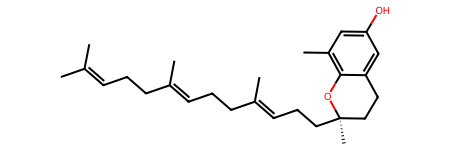

In [41]:
printMol(m)

In [19]:


# fp = Generate.Gen2DFingerprint(m,sigFactory)
fp = Generate.Gen2DFingerprint(m,Gobbi_Pharm2D.factory)

In [20]:
fp

In [22]:
print(fp.GetNumBits(), fp.GetNumOnBits(), fp.GetNumOffBits())

39972 28 39944 <rdkit.rdBase._vecti object at 0x7f2619834e40>


In [9]:
# list(fp.GetOnBits())

In [10]:
for i in list(fp.GetOnBits()):
    print(f" Bit: {i:5d}   Description: {Gobbi_Pharm2D.factory.GetBitDescription(i)}")

NameError: name 'fp' is not defined

Chembl-id:    []
Num of Atoms: 29
#bits:        66
Smiles:       CC(C)=CCC/C(C)=C/CC/C(C)=C/CC[C@]1(C)CCc2cc(O)cc(C)c2O1



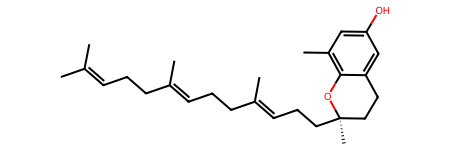

In [41]:
printMol(m)

In [31]:
m.

{}

### `chembl_webresource_client` - Get molecule from ChemBl using inchikey

In [72]:
identifier = df.iloc[0]['InChIKey']
print(f' Get Compound from inchikey : {identifier}')

 Get Compound from inchikey : ZYVXTMKTGDARKR-UHFFFAOYSA-N


In [71]:
from chembl_webresource_client.new_client import new_client
from chembl_webresource_client.utils import utils
import json

In [ ]:
molecule = new_client.molecule
mol = molecule.filter(molecule_structures__standard_inchi_key=identifier) # .only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])

In [78]:
print(type(mol))
print(type(mol[0]['molecule_structures']['molfile']))

<class 'chembl_webresource_client.query_set.QuerySet'>
<class 'str'>


In [74]:
for i,v in mol[0].items():
    if isinstance(v, dict):
        print(f" {i:30s} ===>")
        for ii,vv in v.items():
            print(f"\t* {ii:30s} : {vv}")
    else:
        print(f" {i:30s} : {v}")

 atc_classifications            : []
 availability_type              : -1
 biotherapeutic                 : None
 chebi_par_id                   : None
 chirality                      : -1
 cross_references               : []
 dosed_ingredient               : False
 first_approval                 : None
 first_in_class                 : -1
 helm_notation                  : None
 indication_class               : None
 inorganic_flag                 : -1
 max_phase                      : None
 molecule_chembl_id             : CHEMBL3421968
 molecule_hierarchy             ===>
	* active_chembl_id               : CHEMBL3421968
	* molecule_chembl_id             : CHEMBL3421968
	* parent_chembl_id               : CHEMBL3421968
 molecule_properties            ===>
	* alogp                          : 3.53
	* aromatic_rings                 : 4
	* cx_logd                        : 2.52
	* cx_logp                        : 3.10
	* cx_most_apka                   : None
	* cx_most_bpka               

In [75]:
descs = json.loads(utils.chemblDescriptors(mol[0]['molecule_structures']['molfile'] ))[0]
descs

{'qed': 0.5203017496178387,
 'MolWt': 429.52800000000013,
 'TPSA': 71.34,
 'HeavyAtomCount': 32,
 'NumAromaticRings': 4,
 'NumHAcceptors': 8,
 'NumHDonors': 1,
 'NumRotatableBonds': 5,
 'MolLogP': 3.5343000000000018,
 'MolecularFormula': 'C24H27N7O',
 'Ro3Pass': 0,
 'NumRo5': 0,
 'MonoisotopicMolWt': 429.227708484}

### `rdkit` - GetMorganFingerprint

In [ ]:
nMorgan = 3

mol1 = AllChem.MolFromMolFile(mol[0]['molecule_structures']['molfile'])
fp1 = AllChem.GetMorganFingerprint(mol1, nMorgan).GetNonzeroElements()

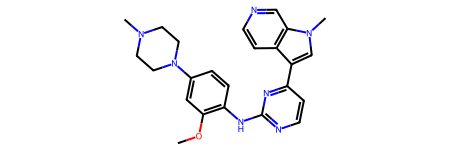

In [207]:
bi = {}
info = {}
mol2 = inchi.MolFromInchi(df_sql['standard_inchi'].item())
fp2 = AllChem.GetMorganFingerprint(mol2, nMorgan, bitInfo= info) 
fp2_bit = AllChem.GetMorganFingerprintAsBitVect(mol2, nMorgan, bitInfo = bi)   #.GetNonzeroElements()
mol2

In [217]:
print(fp2.GetLength())
print(sys.getsizeof(fp2))
# print(fp2.GetTotalVal())
# print(fp2.GetTotalVal())
print(len(fp2.GetNonzeroElements()))
print(fp2.GetNonzeroElements())
print(fp2.GetTotalVal())
print()
print(type(fp2), type(fp2_bit))
print(fp2_bit.GetNumOnBits())
print(fp2_bit.GetNumOffBits())
print(fp2_bit.ToList())

4294967295
112
85
{64070612: 1, 135289256: 1, 300366959: 1, 519369723: 1, 568239325: 1, 572760528: 1, 575877237: 1, 600629739: 1, 723537477: 1, 776134841: 1, 833901780: 1, 847961216: 1, 864674487: 1, 906905665: 1, 932712697: 1, 951226070: 4, 963029399: 1, 966311396: 2, 989770574: 1, 994485099: 1, 1023209243: 1, 1100037548: 1, 1101907775: 1, 1103832125: 1, 1122196822: 1, 1135286194: 1, 1256751600: 1, 1348783936: 1, 1349404210: 1, 1444600902: 1, 1460642244: 1, 1504231094: 1, 1649803239: 1, 1717044408: 1, 1878828116: 1, 1976473596: 1, 2003124847: 1, 2021812431: 1, 2028653172: 1, 2041434490: 3, 2043400544: 1, 2053457817: 1, 2067391019: 1, 2067855442: 1, 2076190208: 1, 2092489639: 3, 2169162777: 1, 2246728737: 3, 2256456343: 1, 2286964769: 1, 2424570928: 1, 2473389857: 1, 2486266314: 1, 2522383065: 1, 2556855854: 1, 2598322190: 2, 2803848648: 4, 2902394255: 1, 2968968094: 4, 2971716993: 1, 2981546848: 1, 3002759401: 1, 3016218268: 1, 3118255683: 1, 3149312511: 1, 3202155986: 1, 3217380708: 

In [208]:
info

{64070612: ((19, 1),),
 135289256: ((3, 3),),
 300366959: ((29, 3),),
 519369723: ((22, 2),),
 568239325: ((19, 3),),
 572760528: ((15, 1),),
 575877237: ((18, 2),),
 600629739: ((27, 1),),
 723537477: ((24, 3),),
 776134841: ((8, 3),),
 833901780: ((28, 2),),
 847961216: ((27, 0),),
 864674487: ((31, 0),),
 906905665: ((20, 2),),
 932712697: ((31, 2),),
 951226070: ((3, 1), (4, 1), (5, 1), (6, 1)),
 963029399: ((30, 1),),
 966311396: ((11, 2), (12, 2)),
 989770574: ((16, 3),),
 994485099: ((13, 1),),
 1023209243: ((25, 2),),
 1100037548: ((25, 1),),
 1101907775: ((26, 1),),
 1103832125: ((6, 2),),
 1122196822: ((20, 3),),
 1135286194: ((22, 1),),
 1256751600: ((16, 2),),
 1348783936: ((4, 2),),
 1349404210: ((24, 2),),
 1444600902: ((7, 3),),
 1460642244: ((17, 2),),
 1504231094: ((27, 3),),
 1649803239: ((21, 3),),
 1717044408: ((7, 2),),
 1878828116: ((13, 2),),
 1976473596: ((5, 2),),
 2003124847: ((19, 2),),
 2021812431: ((28, 1),),
 2028653172: ((6, 3),),
 2041434490: ((24, 0), (

In [201]:
bi

{14: ((9, 2), (10, 2)),
 33: ((30, 3),),
 45: ((21, 1),),
 65: ((20, 2),),
 82: ((14, 2),),
 117: ((18, 2),),
 185: ((8, 3),),
 207: ((28, 1),),
 233: ((3, 2),),
 249: ((31, 2),),
 343: ((21, 2),),
 352: ((18, 1), (4, 3)),
 378: ((24, 0), (25, 0), (26, 0)),
 407: ((30, 1),),
 424: ((3, 3),),
 448: ((26, 3),),
 452: ((17, 2),),
 458: ((23, 2),),
 464: ((15, 1),),
 471: ((13, 3),),
 491: ((27, 1),),
 496: ((16, 2),),
 511: ((29, 2),),
 555: ((27, 2),),
 623: ((19, 2),),
 628: ((6, 3),),
 637: ((28, 3),),
 663: ((5, 3),),
 687: ((30, 2),),
 695: ((31, 0),),
 729: ((11, 3),),
 787: ((8, 2),),
 841: ((2, 1),),
 846: ((16, 3),),
 864: ((23, 3),),
 875: ((13, 1),),
 926: ((9, 0), (10, 0), (11, 0), (12, 0)),
 935: ((28, 0), (29, 0), (30, 0)),
 980: ((19, 1),),
 1019: ((22, 2),),
 1049: ((17, 3),),
 1057: ((0, 0), (1, 0), (2, 0)),
 1072: ((15, 3),),
 1085: ((6, 2),),
 1094: ((7, 3),),
 1108: ((13, 2),),
 1135: ((29, 3),),
 1145: ((0, 1), (1, 1)),
 1152: ((27, 0),),
 1208: ((7, 2),),
 1224: ((20

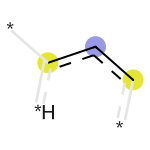

In [218]:
from rdkit.Chem import Draw
mfp2_svg = Draw.DrawMorganBit(mol2, 1750, bi, useSVG=True)
mfp2_svg

In [170]:
# print(mol[0]['molecule_structures']['molfile'])

### Iterate over dataframe and get chemblid for each inchikey

In [13]:
def appendInchi(df: pd.DataFrame, limit:int = 5, nMorgan:int = 3):
    """ function for looping over all molecules """
    NoInchiKey_ctr = 0
    NoInchi_ctr = 0 
    Found_ctr = 0
    ctr = 0 
    molecule = new_client.molecule
    
    if 'chembl_id' not in df.columns:
        df['chembl_id'] = None
        print(' Add chembl_id column')
    else:
        print(' chembl_id column exists ')

    if 'standard_inchi' not in df.columns:
        df['standard_inchi'] = None
        print(' Add standard_inchi column')
    else:
        print(' standard_inchi column exists ')
    
    for comp in df.itertuples():
        ctr +=1
        if ctr > limit: 
            break
        if comp is None: 
            print(f" ctr: {ctr}   row is None  - continue")
            continue

        if pd.isna(comp.InChIKey): 
            print(f" ctr: {ctr}   idx: {comp.Index}   inchikey: {comp.InChIKey } \t Nan row encounntered - continue")
            NoInchiKey_ctr += 1
            continue

        mol = molecule.filter(molecule_structures__standard_inchi_key=comp.InChIKey).only(['molecule_chembl_id', 'molecule_structures']) 
        if len(mol) == 0:
            print(f" ctr: {ctr}   idx: {comp.Index}   inchikey: {comp.InChIKey } \t No row found for inchikey on Compound Structures - continue")
            NoInchi_ctr +=1
            continue
        
        df.at[comp.Index,'chembl_id'] = mol[0]['molecule_chembl_id']
        df.at[comp.Index,'standard_inchi'] =  mol[0]['molecule_structures']['standard_inchi']
        Found_ctr +=1
            
#         df_sql = pd.read_sql(f"SELECT  standard_inchi, chembl_id  FROM  chembl_32.compound_structures as a, " \
#                                 "      chembl_32.molecule_dictionary as b  " \
#                                f"where standard_inchi_key = '{comp.InChIKey}' and a.molregno = b.molregno", con = conn)

#       print(df_sql.shape, ' -' , comp['InChIKey'])
#         mol1 =inchi.MolFromInchi(mol[0]['molecule_structures']['standard_inchi'])
#         fp1 = AllChem.GetMorganFingerprint(mol1, nMorgan).GetNonzeroElements()        
        print(f" index: {comp.Index}  inchikey: {comp.InChIKey} - chemblId: {mol[0]['molecule_chembl_id']} Inchi: {(mol[0]['molecule_structures']['standard_inchi'][:50])}....  ")
#         print(df.loc[comp.Index])
        
    print('\n')    
    print(f" rows with missing InChiKey in input                 : {NoInchiKey_ctr}")
    print(f" rows with missing InChi on Compound Structure table : {NoInchi_ctr}")
    print(f" rows with with valid Chembl_id and InChi            : {Found_ctr} \n")
    print(f"                                               Total : {NoInchiKey_ctr + NoInchi_ctr + Found_ctr} \n\n") 

In [14]:
# df = pd.read_csv('JUMP-MOA_compound_metadata.tsv', delimiter='\t')
# df = pd.read_csv('JUMP-Target-1_compound_metadata.tsv', delimiter='\t')
df = pd.read_csv('JUMP-Target-2_compound_metadata.tsv', delimiter='\t')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   broad_sample  306 non-null    object 
 1   InChIKey      307 non-null    object 
 2   pert_iname    307 non-null    object 
 3   pubchem_cid   297 non-null    float64
 4   target        306 non-null    object 
 5   pert_type     307 non-null    object 
 6   control_type  47 non-null     object 
 7   smiles        307 non-null    object 
dtypes: float64(1), object(7)
memory usage: 19.3+ KB
None


,broad_sample,InChIKey,pert_iname,pubchem_cid,target,pert_type,control_type,smiles
0,BRD-K09338665-001-07-1,KBPLFHHGFOOTCA-UHFFFAOYSA-N,1-octanol,957.0,GJB4,trt,NaN,CCCCCCCCO
1,BRD-K48278478-001-01-2,LOUPRKONTZGTKE-AFHBHXEDSA-N,quinine,94175.0,KCNN4,trt,NaN,COc1ccc2nccc([C@@H](O)[C@H]3C[C@@H]4CC[N@]3C[C...
2,BRD-A85242401-001-12-3,KRGQEOSDQHTZMX-IGCYCDGOSA-N,ascorbic-acid,9888239.0,P3H1,trt,NaN,OC[C@H](O)[C@H]1OC(=O)C(=O)C1O
3,BRD-K93632104-001-17-2,YGSDEFSMJLZEOE-UHFFFAOYSA-N,salicylic-acid,118212070.0,AKR1C1,trt,NaN,OC(=O)c1ccccc1O
4,BRD-K57313110-001-06-8,ODHCTXKNWHHXJC-VKHMYHEASA-N,pidolic-acid,7405.0,VEGFA,trt,NaN,OC(=O)[C@@H]1CCC(=O)N1


In [15]:
# df['chembl_id'] = None
# df['standard_inchi'] = None
# df.head(10)

In [16]:
len(df.index)

307

In [17]:
 appendInchi(df, limit = len(df.index))

 Add chembl_id column
 Add standard_inchi column
 index: 0  inchikey: KBPLFHHGFOOTCA-UHFFFAOYSA-N - chemblId: CHEMBL26215 Inchi: InChI=1S/C8H18O/c1-2-3-4-5-6-7-8-9/h9H,2-8H2,1H3....  
 index: 1  inchikey: LOUPRKONTZGTKE-AFHBHXEDSA-N - chemblId: CHEMBL576997 Inchi: InChI=1S/C20H24N2O2/c1-3-13-12-22-9-7-14(13)10-19(....  
 ctr: 3   idx: 2   inchikey: KRGQEOSDQHTZMX-IGCYCDGOSA-N 	 No row found for inchikey on Compound Structures - continue
 index: 3  inchikey: YGSDEFSMJLZEOE-UHFFFAOYSA-N - chemblId: CHEMBL424 Inchi: InChI=1S/C7H6O3/c8-6-4-2-1-3-5(6)7(9)10/h1-4,8H,(H....  
 index: 4  inchikey: ODHCTXKNWHHXJC-VKHMYHEASA-N - chemblId: CHEMBL397976 Inchi: InChI=1S/C5H7NO3/c7-4-2-1-3(6-4)5(8)9/h3H,1-2H2,(H....  
 index: 5  inchikey: WPEWQEMJFLWMLV-UHFFFAOYSA-N - chemblId: CHEMBL3186534 Inchi: InChI=1S/C24H23N5O/c25-17-24(11-1-2-12-24)19-5-7-2....  
 index: 6  inchikey: LPEPZBJOKDYZAD-UHFFFAOYSA-N - chemblId: CHEMBL23588 Inchi: InChI=1S/C14H10F3NO2/c15-14(16,17)9-4-3-5-10(8-9)1....  
 index: 7 

 index: 85  inchikey: QIHBWVVVRYYYRO-ZDUSSCGKSA-N - chemblId: CHEMBL3092537 Inchi: InChI=1S/C19H19N3O2/c1-13(14-7-3-2-4-8-14)20-18(23....  
 index: 86  inchikey: HGVDHZBSSITLCT-KMFMINBZSA-N - chemblId: CHEMBL4303203 Inchi: InChI=1S/C24H30ClN7O4S/c1-31(2)24(36)13-4-6-15(27-....  
 index: 87  inchikey: OJLOPKGSLYJEMD-URPKTTJQSA-N - chemblId: CHEMBL606 Inchi: InChI=1S/C22H38O5/c1-4-5-14-22(2,26)15-10-12-18-17....  
 index: 88  inchikey: HYFHYPWGAURHIV-JFIAXGOJSA-N - chemblId: CHEMBL46286 Inchi: InChI=1S/C29H39NO9/c1-27(2,33)8-5-10-29(34,16-23(3....  
 index: 89  inchikey: XXRCUYVCPSWGCC-UHFFFAOYSA-N - chemblId: CHEMBL173373 Inchi: InChI=1S/C5H8O3/c1-3-8-5(7)4(2)6/h3H2,1-2H3....  
 index: 90  inchikey: LLVZBTWPGQVVLW-SNAWJCMRSA-N - chemblId: CHEMBL483321 Inchi: InChI=1S/C27H27N5O3/c1-18-13-21(8-11-25(18)35-22-9....  
 index: 91  inchikey: FHPOTBQOUBMMCI-UHFFFAOYSA-N - chemblId: CHEMBL1720563 Inchi: InChI=1S/C14H11Cl3FNO2/c15-9-1-3-12(11(16)7-9)20-5....  
 index: 92  inchikey: SQMWSBKSHWARH

 index: 210  inchikey: NMKJFZCBCIUYHI-UHFFFAOYSA-N - chemblId: CHEMBL465952 Inchi: InChI=1S/C15H11Cl2NO3/c16-10-2-1-3-11(17)14(10)15(....  
 index: 211  inchikey: SBDNJUWAMKYJOX-UHFFFAOYSA-N - chemblId: CHEMBL509 Inchi: InChI=1S/C14H11Cl2NO2/c1-8-6-7-10(15)13(12(8)16)17....  
 index: 212  inchikey: PMATZTZNYRCHOR-CGLBZJNRSA-N - chemblId: CHEMBL160 Inchi: InChI=1S/C62H111N11O12/c1-25-27-28-40(15)52(75)51-....  
 index: 213  inchikey: IPSSXIMJJXSJQB-FQEVSTJZSA-N - chemblId: CHEMBL4303719 Inchi: InChI=1S/C25H31Cl2N3O5/c1-3-34-25(33)20(15-17-7-5-....  
 index: 214  inchikey: OHRURASPPZQGQM-GCCNXGTGSA-N - chemblId: CHEMBL343448 Inchi: InChI=1S/C24H36N4O6S2/c1-6-16-21(30)28-20(14(4)5)2....  
 ctr: 216   idx: 215   inchikey: ZZZRUAITSXLWBH-CSYJEMQYSA-N 	 No row found for inchikey on Compound Structures - continue
 index: 216  inchikey: PDMUGYOXRHVNMO-UHFFFAOYSA-N - chemblId: CHEMBL2001019 Inchi: InChI=1S/C19H16N8O/c28-7-6-26-12-15(9-22-26)17-10-....  
 index: 217  inchikey: YKJYKKNCCRKFSL-RDB

In [18]:
df.head(10)

,broad_sample,InChIKey,pert_iname,pubchem_cid,target,pert_type,control_type,smiles,chembl_id,standard_inchi
0,BRD-K09338665-001-07-1,KBPLFHHGFOOTCA-UHFFFAOYSA-N,1-octanol,957.0,GJB4,trt,NaN,CCCCCCCCO,CHEMBL26215,"InChI=1S/C8H18O/c1-2-3-4-5-6-7-8-9/h9H,2-8H2,1H3"
1,BRD-K48278478-001-01-2,LOUPRKONTZGTKE-AFHBHXEDSA-N,quinine,94175.0,KCNN4,trt,NaN,COc1ccc2nccc([C@@H](O)[C@H]3C[C@@H]4CC[N@]3C[C...,CHEMBL576997,InChI=1S/C20H24N2O2/c1-3-13-12-22-9-7-14(13)10...
2,BRD-A85242401-001-12-3,KRGQEOSDQHTZMX-IGCYCDGOSA-N,ascorbic-acid,9888239.0,P3H1,trt,NaN,OC[C@H](O)[C@H]1OC(=O)C(=O)C1O,None,None
3,BRD-K93632104-001-17-2,YGSDEFSMJLZEOE-UHFFFAOYSA-N,salicylic-acid,118212070.0,AKR1C1,trt,NaN,OC(=O)c1ccccc1O,CHEMBL424,"InChI=1S/C7H6O3/c8-6-4-2-1-3-5(6)7(9)10/h1-4,8..."
4,BRD-K57313110-001-06-8,ODHCTXKNWHHXJC-VKHMYHEASA-N,pidolic-acid,7405.0,VEGFA,trt,NaN,OC(=O)[C@@H]1CCC(=O)N1,CHEMBL397976,"InChI=1S/C5H7NO3/c7-4-2-1-3(6-4)5(8)9/h3H,1-2H..."
5,BRD-K25244359-066-04-9,WPEWQEMJFLWMLV-UHFFFAOYSA-N,apatinib,11315474.0,CSK,trt,NaN,O=C(Nc1ccc(cc1)C1(CCCC1)C#N)c1cccnc1NCc1ccncc1,CHEMBL3186534,InChI=1S/C24H23N5O/c25-17-24(11-1-2-12-24)19-5...
6,BRD-K44067360-001-30-3,LPEPZBJOKDYZAD-UHFFFAOYSA-N,flufenamic-acid,3371.0,GJB4,trt,NaN,OC(=O)c1ccccc1Nc1cccc(c1)C(F)(F)F,CHEMBL23588,"InChI=1S/C14H10F3NO2/c15-14(16,17)9-4-3-5-10(8..."
7,BRD-K73276278-305-02-9,CYYNMPPFEJPBJD-OAQYLSRUSA-N,MCOPPB,24800108.0,OPRL1,trt,NaN,CC1(CCCCCCC1)N1CCC(CC1)n1c(nc2ccccc12)[C@@H]1C...,CHEMBL481512,InChI=1S/C26H40N4/c1-26(15-7-3-2-4-8-16-26)29-...
8,BRD-K59058747-001-22-9,PWKSKIMOESPYIA-BYPYZUCNSA-N,acetylcysteine,12035.0,SLC7A11,trt,NaN,CC(=O)N[C@@H](CS)C(O)=O,CHEMBL600,"InChI=1S/C5H9NO3S/c1-3(7)6-4(2-10)5(8)9/h4,10H..."
9,BRD-K68982262-001-02-9,DJKJVWJQAVGLHJ-YPMHNXCESA-N,A-987306,25109291.0,CCR1,trt,NaN,Nc1nc(N2CCNCC2)c2CCC3=C([C@@H]4CCCC[C@@H]4O3)c2n1,CHEMBL519240,InChI=1S/C18H25N5O/c19-18-21-16-12(17(22-18)23...


In [16]:
def getChemblId(df: pd.DataFrame, limit:int = 5, nMorgan = 3):
    """ function for looping over all molecules """
    
    ctr =  0
    for  comp in df.itertuples():
        ctr += 1
        if ctr > limit: 
            break
        if  comp.standard_inchi is None: 
            print(' Nan row encounntered - continue')
            continue
        else:
            mol1 =inchi.MolFromInchi(comp.standard_inchi)
            fp1 = AllChem.GetMorganFingerprint(mol1, nMorgan).GetNonzeroElements()
            print(f" ctr: {ctr}  idx: {comp.Index}   inchikey: {comp.InChIKey}  chemblId is : {comp.chembl_id}" )
            yield (comp.chembl_id, fp1)
        


In [17]:
len(df.index)

307

In [18]:
fingerprints = dict()

for idx,  (i, j) in enumerate( getChemblId(df, limit = len(df.index)) ) :
#     print(f" idx  is {idx} ,  fingerprints[{i}]  - items in fingerprint  {len(j)}" )
    fingerprints[i] = j

 ctr: 1  idx: 0   inchikey: TZDUHAJSIBHXDL-UHFFFAOYSA-N  chemblId is : CHEMBL1628502
 ctr: 2  idx: 1   inchikey: HTIQEAQVCYTUBX-UHFFFAOYSA-N  chemblId is : CHEMBL1491
 ctr: 3  idx: 2   inchikey: PBBGSZCBWVPOOL-UHFFFAOYSA-N  chemblId is : CHEMBL6615
 ctr: 4  idx: 3   inchikey: LOUPRKONTZGTKE-AFHBHXEDSA-N  chemblId is : CHEMBL576997
 ctr: 5  idx: 4   inchikey: NYNZQNWKBKUAII-KBXCAEBGSA-N  chemblId is : CHEMBL3889654
 ctr: 6  idx: 5   inchikey: HCRKCZRJWPKOAR-JTQLQIEISA-N  chemblId is : CHEMBL220491
 ctr: 7  idx: 6   inchikey: MDKAFDIKYQMOMF-UHFFFAOYSA-N  chemblId is : CHEMBL4303589
 ctr: 8  idx: 7   inchikey: YYDUWLSETXNJJT-MTJSOVHGSA-N  chemblId is : CHEMBL2037226
 ctr: 9  idx: 8   inchikey: WPEWQEMJFLWMLV-UHFFFAOYSA-N  chemblId is : CHEMBL3186534
 ctr: 10  idx: 9   inchikey: OUZWUKMCLIBBOG-UHFFFAOYSA-N  chemblId is : CHEMBL18
 Nan row encounntered - continue
 ctr: 12  idx: 11   inchikey: HFPLHASLIOXVGS-UHFFFAOYSA-N  chemblId is : CHEMBL290904
 ctr: 13  idx: 12   inchikey: MAKMQGKJURAJE

In [19]:
 len(fingerprints)
# df1.info()

299

In [30]:
fingerprintCsvFile = 'fingerprints.csv'
fingerprintNpyFile = 'fingerprints_32000.npy'
compoundFeatureFile = 'JUMP-Target-1_compound_metadata_X.csv'
print(f" fingerprint CSC file   :   {fingerprintFile}")
print(f" fingerprint numpy file :   {fingerprintNpyFile}")
print(f" compounds file         :   {compoundFeatureFile}")

 fingerprint CSC file   :   fingerprints.csv
 fingerprint numpy file :   fingerprints_32000.npy
 compounds file         :   JUMP-Target-1_compound_metadata_X.csv


In [31]:
print(type(fingerprints))
fp_key_list = list(fingerprints.keys())
print(len(fp_key_list))
print(fp_key_list[0])
print(fingerprints[fp_key_list[0]])

<class 'dict'>
299
CHEMBL1628502
{130838830: 1, 164220124: 1, 171200514: 1, 231201637: 1, 400448488: 1, 481947414: 1, 581301497: 1, 769380566: 1, 785693365: 1, 847336149: 1, 864662311: 2, 864674487: 2, 864942730: 2, 959391939: 2, 989142202: 1, 1064883769: 1, 1219006618: 1, 1384287572: 1, 1428247845: 1, 1510328189: 2, 1533864325: 2, 1758212621: 1, 1962383056: 1, 2035223670: 1, 2059730245: 1, 2068601177: 1, 2073911110: 1, 2119439498: 2, 2142032900: 3, 2245273601: 2, 2245384272: 2, 2246699815: 3, 2246728737: 3, 2318542907: 1, 2479916646: 2, 2807496773: 2, 2968968094: 5, 2976816164: 1, 3139466427: 1, 3168006864: 1, 3537119515: 3, 3599133573: 1, 3752318298: 1, 3937799038: 1, 3958686461: 1, 3973210402: 1, 4036774035: 1, 4064422336: 1, 4176247988: 1, 4264319555: 1, 4278941385: 1}


In [32]:
## Write CSV dataset of compound, feature
saveFingerprints(fingerprints, fingerprintCsvFile)

 => fingerprints written to fingerprints.csv 


In [54]:
def saveFingerprintsNpy_Dev(results:dict, fingerprintFile:str, featuresFile:str, ecfp_fold:int =32000, verbose:bool = False):
    """ write fingerprints to npy, compunds to CSV file """
    ## fp2 : list of tuples : each tuple: (compound id, (array of features, array of counts))
    fp2 =[(x,(np.array(list(results[x].keys())), np.array(list(results[x].values())))) for x in results] #TODO: Modify to save compound list

    
    ## cmpd: tuple of strings, each representing a chembl compound
    ## ecfp: tuple of tuples each tuple being an array of (features, counts)
    cmpd, ecfp   = zip(*fp2) 
    if verbose:
        print(' fp2  :  list of ', type(fp2[0]), fp2[0])        
        print(' cmpd :  list of ', type(cmpd[0]), cmpd[:10], '\n')
        print(' ecfp :  list of ', type(ecfp[0]), ecfp[0], '\n')
    
    ## feat  : tuple of ndarrays, each member being a ndarray of features 
    ## counts: tuple of ndarrays, each member being a ndarray of counts 
    feat, counts = zip(*ecfp)
    
    if verbose:
        print(' feat[0] :  ', type(feat[0]), feat[0], '\n')
        print(' counts[0] :  ' ,type(counts[0]), counts[0], '\n')
    
    ## Create indicies for csr matrix
    ## the column indices for row i are stored in indices[indptr[i]:indptr[i+1]] 
    ## their corresponding values are stored in data[indptr[i]:indptr[i+1]]
    lens    = np.array([len(f) for f in feat])
    indptr  = np.concatenate([[0], np.cumsum(lens)])
    indices = np.concatenate(feat) % ecfp_fold
    data    = np.ones(indices.shape[0])
    
    if verbose:    
        print(f" cmpd :   type {type(cmpd)}  len: {len(cmpd)} \n\t {cmpd[0]}")
        print(f" ecfp :   type {type(ecfp)}  len: {len(ecfp)} \n\t {ecfp[0]}")
        print(f" feat :   type {type(feat)}  len: {len(feat)} \n\t {feat[0]}")

        print(f" counts :   type {type(counts)}  len: {len(counts)}")
        print(f"     {counts[:10]}")

        print(f" lens :   type {type(lens)}  len: {len(lens)}")
        print(f"     {lens[:10]}")

        print(f" indptr :   type {type(indptr)}  len: {len(indptr)}")
        print(f"     {indptr[:10]}")

        print(f" feat prefold:   type {type(np.concatenate(feat))}  len: {len(np.concatenate(feat))}")    
        print(f"     {np.concatenate(feat)[:10]}")

        print(f" indices :   type {type(indices)}  len: {len(indices)}")
        print(f"     {indices[:10]}")

        print(f" data :   type {type(data)}  len: {len(data)}")
        print(f"     {data[:10]}")

    
    ## Create CSR matrix
    csr     = csr_matrix((data, indices, indptr), shape=(len(feat), ecfp_fold))
    csr.sum_duplicates()
    csr.data[:] = 1.0
    
    # write fingerprint data to numpy CSR sparse matrix 
    np.save(fingerprintFile, csr)
    print(f" => fingerprints written to {fingerprintFile} ")    
    
    # write compounds to csv file 
    pd.DataFrame(cmpd).to_csv(featuresFile, header=False)
    print(f" => compounds written to {featuresFile} ")     

In [55]:
saveFingerprintsNpy_Dev(fingerprints, fingerprintNpyFile, compoundFeatureFile, ecfp_fold=32000)

 => fingerprints written to fingerprints_32000.npy 
 => compounds written to JUMP-Target-1_compound_metadata_X.csv 
